### In this notebook we show summary stats, correlations, statistical tests and exploratory analysis on the Handshake Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
Master_fname = '../data/all_data_numeric.csv'
df = pd.read_csv(Master_fname)

In [3]:
#columns in this dataset names
df.columns

Index(['Students Username', 'US Citizen', 'School Year Name',
       'Educations Cumulative Gpa', 'Documents Count', 'Drop_in_advisor',
       'Appointment Type Length (Minutes)', 'days_before_due', 'pre_reg',
       'check_in', 'Engaged_Fair', 'Engaged_Appointment', 'Engaged_Jobs'],
      dtype='object')

##### finding correlations

In [4]:
usecols = ['US Citizen', 'School Year Name','Educations Cumulative Gpa', 
           'Documents Count', 'Drop_in_advisor','Appointment Type Length (Minutes)',
           'days_before_due', 'pre_reg','check_in', 'Engaged_Fair', 
           'Engaged_Appointment', 'Engaged_Jobs']
df_corr = df[usecols].corr().abs()

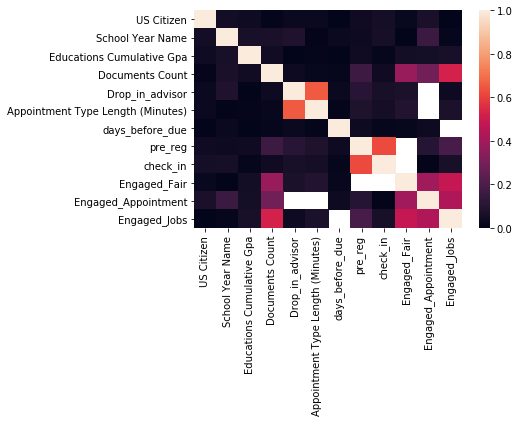

In [5]:
sns.heatmap(df_corr, 
        xticklabels=df_corr.columns,
        yticklabels=df_corr.index)

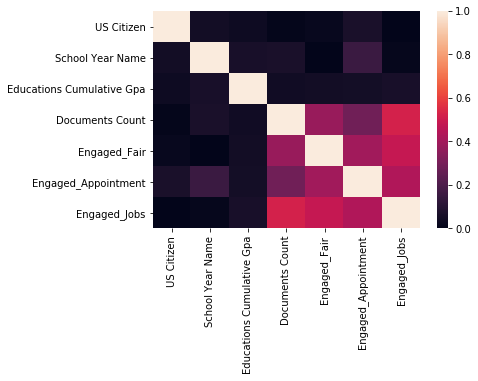

In [6]:
student_cols = ['US Citizen','School Year Name','Educations Cumulative Gpa','Documents Count','Engaged_Fair',
                'Engaged_Appointment','Engaged_Jobs']
df_corr_student = df[student_cols].corr().abs()
sns.heatmap(df_corr_student, 
        xticklabels=df_corr_student.columns,
        yticklabels=df_corr_student.index)

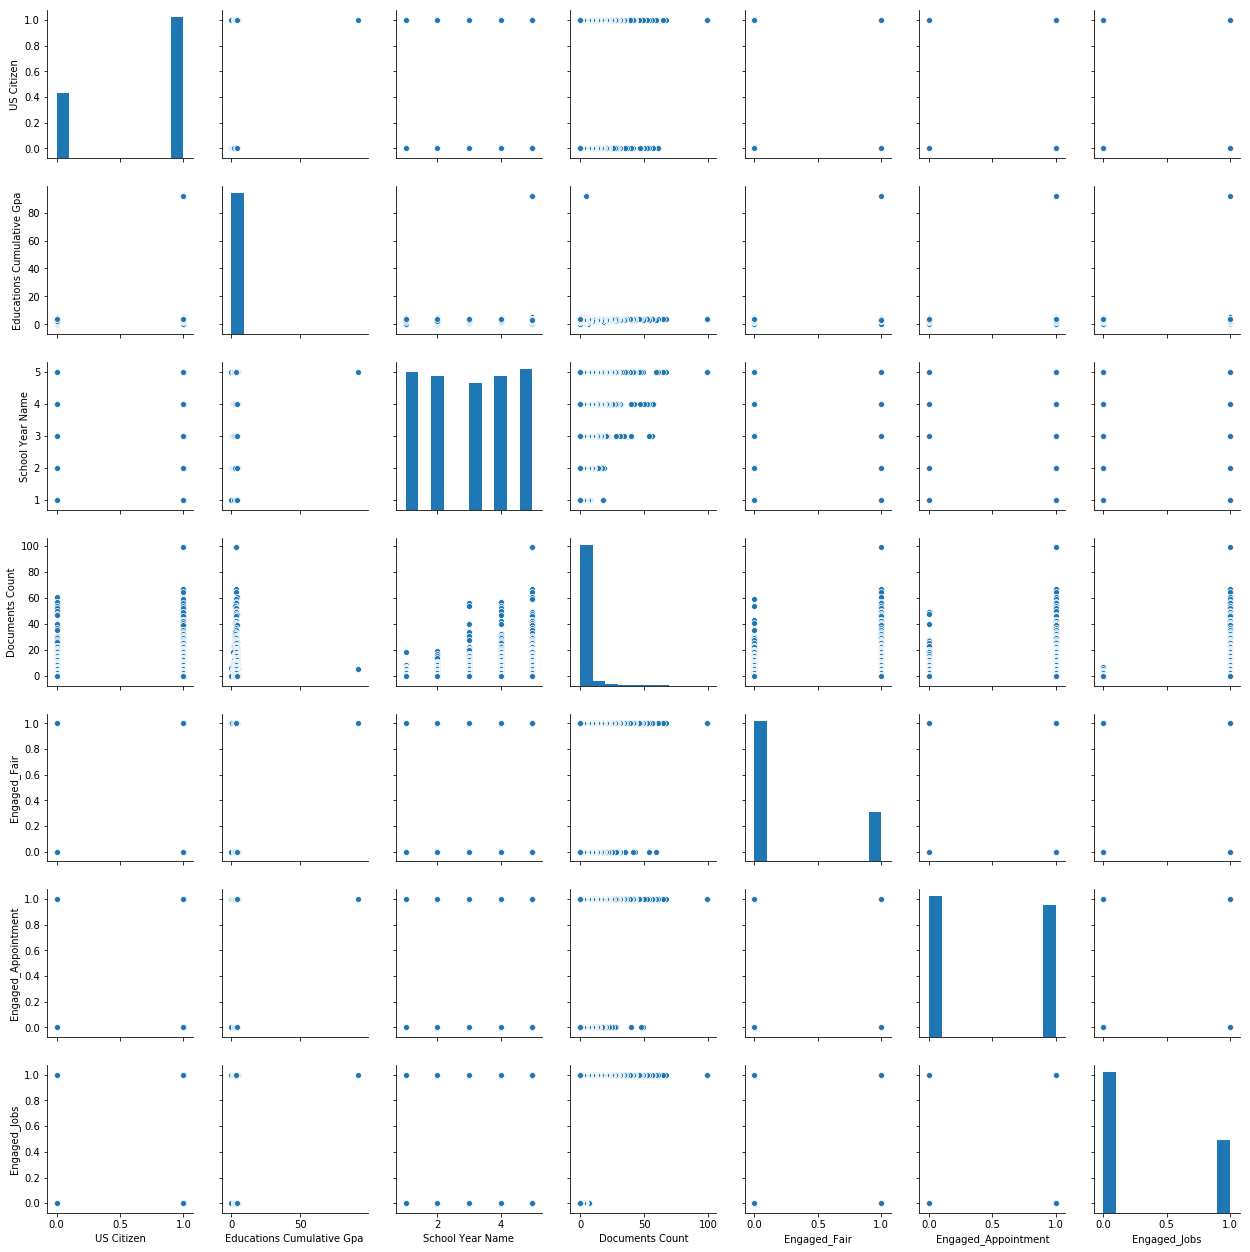

In [7]:
pair_cols = ['US Citizen','Educations Cumulative Gpa','School Year Name','Documents Count','Engaged_Fair',
                'Engaged_Appointment','Engaged_Jobs']
sns.pairplot(df[pair_cols].dropna());

In [8]:
x = df['Educations Cumulative Gpa'].max()
df[df['Educations Cumulative Gpa'] == x]

,Students Username,US Citizen,School Year Name,Educations Cumulative Gpa,Documents Count,Drop_in_advisor,Appointment Type Length (Minutes),days_before_due,pre_reg,check_in,Engaged_Fair,Engaged_Appointment,Engaged_Jobs
890,dbignall,1,5.0,92.0,5,0.0,30.0,12.0,1.0,1.0,1,1,1


/Users/student/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


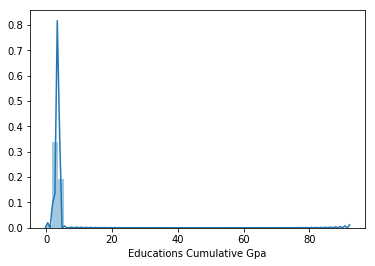

In [9]:
sns.distplot(df['Educations Cumulative Gpa'].dropna())

##### Stats tests

In [10]:
from scipy.stats import mannwhitneyu as mw
from scipy.stats import ttest_ind as tt

In [11]:
def stats(df, grp):        
    print('group name: '+ grp)
    for feature in df.columns:
        engaged = df[df[grp]==1][feature]
        not_engaged = df[df[grp]==0][feature]

        t_d, t_pval = tt(engaged, not_engaged)
        mw_d, mw_pval = mw(engaged,not_engaged)

        print('feature name ', feature)
        print('t-test p value: ', t_pval)
        print('MW p value: ',mw_pval)
        print('engaged mean: ', engaged.mean())
        print('not engaged mean: ',not_engaged.mean())
        print()

In [12]:
y_list = ['Engaged_Jobs','Engaged_Fair','Engaged_Appointment']
feat_names = ['US Citizen','School Year Name','Educations Cumulative Gpa','Documents Count','Engaged_Fair',
            'Engaged_Appointment','Engaged_Jobs']
df_stats = df[feat_names].dropna()
for y in y_list:
    stats(df_stats,y)

group name: Engaged_Jobs
feature name  US Citizen
t-test p value:  2.040713380834697e-11
MW p value:  1.0856923209551645e-11
engaged mean:  0.6361236802413273
not engaged mean:  0.7105831533477321

feature name  School Year Name
t-test p value:  6.397805058293321e-177
MW p value:  1.4294148186277106e-168
engaged mean:  3.633107088989442
not engaged mean:  2.684861574710387

feature name  Educations Cumulative Gpa
t-test p value:  6.6338854742024915e-09
MW p value:  4.988477935594327e-09
engaged mean:  3.4879788838612362
not engaged mean:  3.328435107009627

feature name  Documents Count
t-test p value:  0.0
MW p value:  0.0
engaged mean:  5.02526395173454
not engaged mean:  0.13292754761437267

feature name  Engaged_Fair
t-test p value:  0.0
MW p value:  1.6339481690679272e-307
engaged mean:  0.5169683257918553
not engaged mean:  0.12409189083055173

feature name  Engaged_Appointment
t-test p value:  4.24851108257831e-211
MW p value:  5.568227224500984e-199
engaged mean:  0.72058823529

##### co-efficient weights and p-values from logistic regression model

In [13]:
import statsmodels.formula.api as sm

In [14]:
def logit(df_m,y_m):
    X = df_m.copy()
    #X['intercept'] = 1
    model = sm.Logit(y_m, X)
    result = model.fit()
    print(result.summary())

In [15]:
y_list = ['Engaged_Jobs','Engaged_Fair','Engaged_Appointment']
feat_names = ['US Citizen','School Year Name','Educations Cumulative Gpa','Documents Count','Engaged_Fair',
            'Engaged_Appointment','Engaged_Jobs']
df_logit = df[feat_names].dropna()
for y in y_list:
    feat_names.remove(y)
    logit(df_logit,df_logit[y])

/Users/student/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix